In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import ipympl
from scipy.optimize import curve_fit

In [27]:
vims_wave = np.loadtxt('vims_wave.txt')
new_array = ['_0405','_0607','_0809','_1011','_1213','_1415','_1617']
for number in new_array:
    new_string = 'df'+number+' = '+'pd.read_pickle("data/data'+number+'.pkl")'
    exec(new_string)

In [28]:
def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

band_channels = [29,30,31,32,33,34,46,47,48,49,50,51,52,53,54,55,56,57,58,59,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,102,103,104,105]

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_fit = powerlaw(vims_wave,*my_fit)
    return final_fit

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra

In [29]:
spectra_list = []
for number in new_array:
    new_string = 'spectra'+number+' = '+'custom_fit(df'+number+')'
    exec(new_string)
    spectrum = 'spectra'+number
    new_spectrum = locals()[spectrum]
    spectra_list.append(new_spectrum)

In [30]:
window = list(range(56,83))

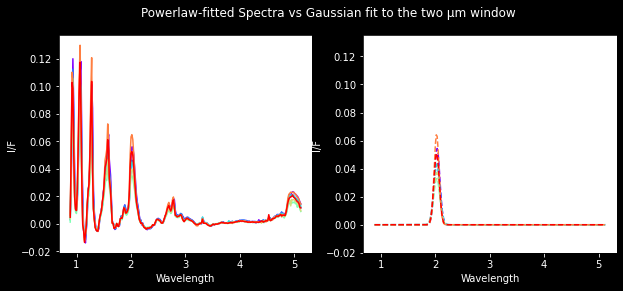

In [65]:
%matplotlib inline
fig, axs = plt.subplots(1,2,figsize=(10,4),facecolor='black')
fig.suptitle('Powerlaw-fitted Spectra vs Gaussian fit to the two µm window',color='white')
x = vims_wave
color = plt.cm.rainbow(np.linspace(0,1,7))
for i,c in zip(range(7),color):
    y = spectra_list[i]
    my_fit,_ = curve_fit(gaussian,x[window],y[window],p0=[.05,2,.05])
    axs[0].plot(x,y,c=c)
    axs[1].plot(x,gaussian(x,*my_fit),'--',c=c)
axs[1].set_ylim([-.02,.135])
for ax in fig.get_axes():
    ax.tick_params(axis='x',colors='white')
    ax.tick_params(axis='y',colors='white')
    ax.set_xlabel('Wavelength',color='white')
    ax.set_ylabel('I/F',color='white')
plt.show()